In [64]:
import zipfile
import os
from nt_toolbox.nt_toolbox.general import *
from nt_toolbox.nt_toolbox.signal import *
%matplotlib inline
%load_ext autoreload
#%autoreload 2         extension to automatically reload all modules
import skimage
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from logging import exception
import src.params as pm 
from src.fcts import * 
from src.algorithms import *
import torch
import deepinv as dinv
from deepinv.utils.plotting import plot
from deepinv.utils.demo import load_url_image, get_image_url
import torchvision.io as io




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


0.0682833194732666


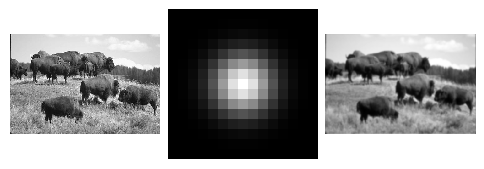

In [65]:
j = 3
filename = "ImagesOriginales/%s.jpg" %j
img = np.array(plt.imread(filename)/255, dtype="float64")
(m,n) = np.shape(img)
img = torch.tensor(img,dtype=torch.float)
img = img.unsqueeze(0).unsqueeze(0)
start = time.time()
h = dinv.physics.blur.gaussian_blur(sigma=(2, 2), angle=0)
physics = dinv.physics.BlurFFT(filter = h, device=pm.device,  padding='circular', img_size=(1,m,n))
y = physics(img)
end = time.time()

print(end-start)


plot([img,h,y])

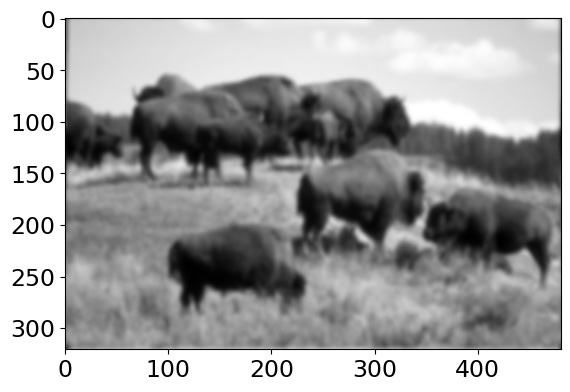

In [66]:
j = 3
filename = "ImagesOriginales/%s.jpg" %j
img = np.array(plt.imread(filename)/255, dtype="float64")
(m,n) = np.shape(img)
h = blurringKernel(m,n,variance=pm.kernelVariance)
y2 = forwardOperator(img,h)

plt.imshow(y2, cmap='gray')

In [67]:
import skimage.metrics
print(y.shape)
y = y.squeeze(0).squeeze(0)
y = y.numpy()


metrics = skimage.metrics.structural_similarity(y,y2,data_range = 1)
print(f"The SSIM between FFT from scratch and deepInv library is {metrics}")

torch.Size([1, 1, 321, 481])
The SSIM between FFT from scratch and deepInv library is 0.9959970919235408


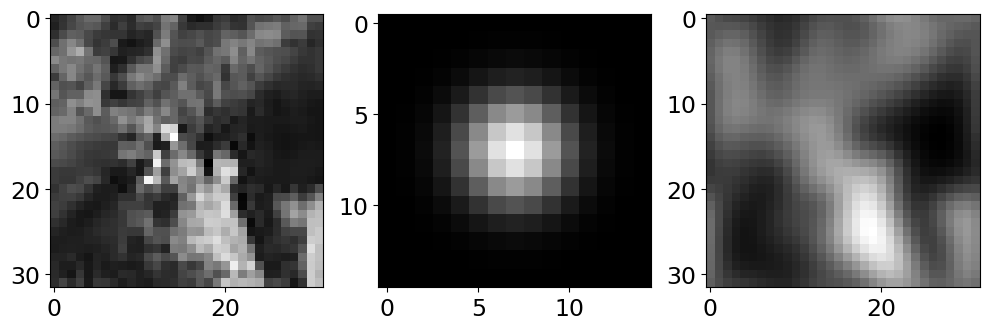

In [19]:
x_gray = io.read_image(filename)/255
x_gray = x_gray.unsqueeze(1)
x_gray = x_gray[:,:,100:132,200:232]

filter_0 = dinv.physics.blur.gaussian_blur(sigma=(2, 2), angle=0)

physics = dinv.physics.Blur(filter_0, device=pm.device,  padding='circular')
yPatch = physics(x_gray)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
x_gray = x_gray.squeeze(0,1)
plt.imshow(x_gray, cmap = 'gray')
plt.subplot(1, 3, 2)
filter_0 = filter_0.squeeze(0,1)
plt.imshow(filter_0, cmap='gray')
plt.subplot(1, 3, 3)
yPatch = yPatch.squeeze(0,1)
plt.imshow(yPatch, cmap='gray')



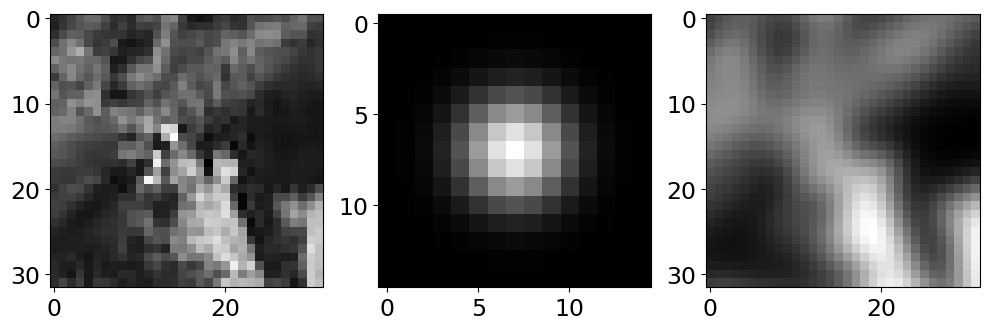

In [20]:
x_gray = io.read_image(filename)/255
x_gray = x_gray.unsqueeze(1)

filter_0 = dinv.physics.blur.gaussian_blur(sigma=(2, 2), angle=0)

physics = dinv.physics.Blur(filter_0, device=pm.device,  padding='circular')
y = physics(x_gray)

x_gray = x_gray[:,:,100:132,200:232]
y = y[:,:,100:132,200:232]

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
x_gray = x_gray.squeeze(0,1)
plt.imshow(x_gray, cmap = 'gray')
plt.subplot(1, 3, 2)
filter_0 = filter_0.squeeze(0,1)
plt.imshow(filter_0, cmap='gray')
plt.subplot(1, 3, 3)
y = y.squeeze(0,1)
plt.imshow(y, cmap='gray')



The SSIM value between A(x_Patch) and Ax_Patch is 0.9637175853523983
The L2 norm between A(x_Patch) and Ax_Patch is 0.8134884238243103


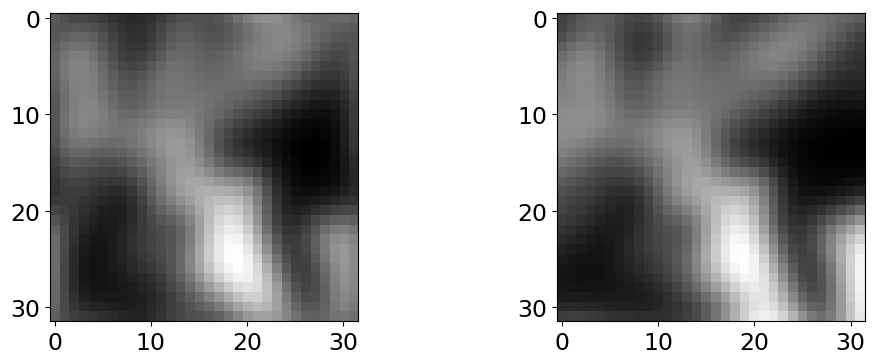

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(yPatch, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(y, cmap='gray')

yPatch = yPatch.numpy()
y = y.numpy()



metrics = skimage.metrics.structural_similarity(yPatch,y, data_range=1)
print(f"The SSIM value between A(x_Patch) and (Ax)_Patch is {metrics}")
L2norm = np.linalg.norm(y-yPatch)
print(f"The Frobenius norm between A(x_Patch) and (Ax)_Patch is {L2norm}")

# Notice how the maximum of the FT of the filter is always 1. So we can put the 1 inside the Tau

In [63]:
filter_0 = dinv.physics.blur.gaussian_blur(sigma=(3, 0.2), angle=0.0)
hF = np.real(np.fft.fft2(np.fft.fftshift(filter_0)))
print(hF.max())

filter_0 = dinv.physics.blur.gaussian_blur(sigma=(2, 2), angle=0.0)
hF = np.real(np.fft.fft2(np.fft.fftshift(filter_0)))
print(hF.max())

filter_0 = dinv.physics.blur.gaussian_blur(sigma=(3, 3), angle=0.0)
hF = np.real(np.fft.fft2(np.fft.fftshift(filter_0)))
print(hF.max())

0.9999999733042549
1.0000000808882277
1.0000000301428251


___________